## 📌 Model2 – Temel CNN (Sıfırdan Eğitilen Model)

### 👤 Öğrenci Bilgileri
Öğrenci Adı:	 ABDUL RAHMAN

Öğrenci Soyadı:	KHANOUM

Öğrenci No:	2212721317

GitHub Projesi:	https://github.com/Abood88088/CNN_siniflandirma

---

### 📂 Veri Seti Açıklaması
Bu modelde, tarafımdan **telefon kamerası ile çekilmiş** ve iki sınıftan oluşan özgün bir veri seti kullanılmıştır.  
Veri seti aşağıdaki sınıflardan oluşmaktadır:

- **Lamba**
- **Saat**

Tüm görseller **128×128** boyutuna getirilmiş ve veri seti **%70 eğitim, %15 doğrulama, %15 test** olacak şekilde ayrılmıştır.

---

### 🧠 Modelin Amacı
Bu modelin amacı, **transfer learning kullanılmadan**, yalnızca **temel evrişimli sinir ağı (CNN)** katmanları ile görsel sınıflandırma performansını değerlendirmektir.  
Model, tamamen **sıfırdan (from scratch)** eğitilmiştir.

---

### 🏗️ Model Mimarisi
Model2 aşağıdaki katmanlardan oluşmaktadır:

- **Conv2D (32 filtre) + MaxPooling**
- **Conv2D (64 filtre) + MaxPooling**
- **Conv2D (128 filtre) + MaxPooling**
- **Flatten**
- **Dense (128 nöron, ReLU)**
- **Dropout (0.3)**
- **Dense (2 nöron, Softmax)**

Bu yapı sayesinde model, görüntülerden kademeli olarak özellik çıkarımı yapabilmektedir.

---

### ⚙️ Eğitim Detayları
- **Optimizer:** Adam  
- **Learning Rate:** 0.001  
- **Kayıp Fonksiyonu:** Categorical Crossentropy  
- **Epoch Sayısı:** 25  
- **Early Stopping:** Doğrulama kaybına göre uygulanmıştır  

---

### 📊 Eğitim ve Test Sonuçları
Gerçek eğitim çıktıları incelendiğinde aşağıdaki sonuçlar elde edilmiştir:

- **Eğitim Doğruluğu (En Yüksek):** %100  
- **Doğrulama Doğruluğu (En İyi):** %96.67  
- **Test Doğruluğu:** **%93.75**  
- **Test Kayıp Değeri (Loss):** **0.2244**

Accuracy ve loss grafiklerinde, modelin kısa sürede yüksek doğruluğa ulaştığı ve öğrenme sürecinin stabil olduğu gözlemlenmiştir.

---

### 📝 Genel Değerlendirme
Model2, transfer learning kullanılmamasına rağmen **lamba ve saat sınıflarını ayırt etmede başarılı bir performans** sergilemiştir.  
Yüksek doğrulama ve test doğruluğu, temel CNN mimarisinin bu veri seti için yeterli olduğunu göstermektedir.  
Bu sonuçlar, küçük ve özgün veri setlerinde dahi uygun mimari ve parametreler ile etkili sınıflandırma yapılabileceğini ortaya koymaktadır.


1. Bölüm — Google Drive Bağlantısı

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


2. Bölüm — Veri Setinin Bölünmesi (Train / Validation / Test)

In [ ]:
import os, shutil, random
from pathlib import Path

DATASET_DIR = "/content/drive/MyDrive/CNN_siniflandirma/dataset"
OUTPUT_DIR  = "/content/data_split"

train_ratio = 0.7
val_ratio   = 0.15
test_ratio  = 0.15

random.seed(42)

# حذف التقسيم القديم إن وجد
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)

for split in ["train", "val", "test"]:
    for cls in os.listdir(DATASET_DIR):
        os.makedirs(os.path.join(OUTPUT_DIR, split, cls), exist_ok=True)

for cls in os.listdir(DATASET_DIR):
    imgs = list(Path(DATASET_DIR, cls).glob("*.jpg"))
    random.shuffle(imgs)

    n = len(imgs)
    n_train = int(n * train_ratio)
    n_val   = int(n * val_ratio)

    train_imgs = imgs[:n_train]
    val_imgs   = imgs[n_train:n_train+n_val]
    test_imgs  = imgs[n_train+n_val:]

    def copy_imgs(img_list, split):
        for img in img_list:
            dst = Path(OUTPUT_DIR, split, cls, img.name)
            shutil.copy(img, dst)

    copy_imgs(train_imgs, "train")
    copy_imgs(val_imgs, "val")
    copy_imgs(test_imgs, "test")

print("✅ Data split completed!")


✅ Data split completed!


3. Bölüm — Bölünmüş Veri Sayılarının Kontrolü

In [ ]:
for split in ["train", "val", "test"]:
    print(split.upper())
    for cls in os.listdir(os.path.join(OUTPUT_DIR, split)):
        print(cls, ":", len(os.listdir(os.path.join(OUTPUT_DIR, split, cls))))


TRAIN
saat : 35
lamba : 35
VAL
saat : 7
lamba : 7
TEST
saat : 8
lamba : 8


4. Bölüm — Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


5. Bölüm — ImageDataGenerator ile Veri Yükleme

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 16

train_dir = "/content/data_split/train"
val_dir   = "/content/data_split/val"
test_dir  = "/content/data_split/test"

train_gen = ImageDataGenerator(rescale=1./255)
val_gen   = ImageDataGenerator(rescale=1./255)
test_gen  = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical", shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_dir, target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical", shuffle=False
)

test_data = test_gen.flow_from_directory(
    test_dir, target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical", shuffle=False
)


Found 70 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


6. Bölüm — Model2 (Basit CNN) Mimarisi

In [ ]:
model2 = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(2, activation="softmax")
])


7. Bölüm — Modelin Derlenmesi (Compile)

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


8. Bölüm — EarlyStopping Tanımı

In [ ]:
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]


9. Bölüm — Modelin Eğitilmesi

In [ ]:
history2 = model2.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4753 - loss: 0.8299 - val_accuracy: 0.5714 - val_loss: 0.6839
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4465 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.6616
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6708 - loss: 0.6190 - val_accuracy: 0.8571 - val_loss: 0.5683
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8677 - loss: 0.4427 - val_accuracy: 0.8571 - val_loss: 0.3206
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9802 - loss: 0.1559 - val_accuracy: 0.9286 - val_loss: 0.1227
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9660 - loss: 0.1402 - val_accuracy: 0.9286 - val_loss: 0.1859
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 0.8571 - val_loss: 0.3926
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9575 - loss: 0.2809 - val_accuracy: 0.9286 - val_loss: 0.1234
Epoch 9/

10. Bölüm — Accuracy ve Loss Grafiklerinin Çizdirilmesi

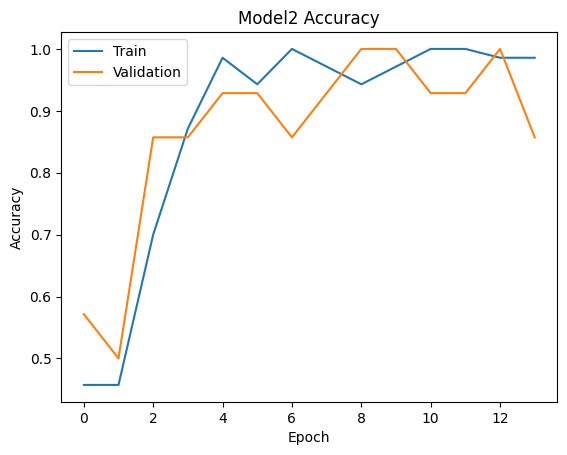

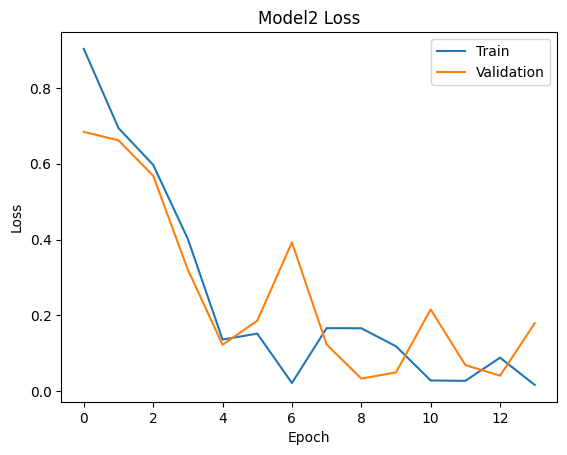

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Model2 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Loss
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model2 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


11. Bölüm — Test Verisi ile Değerlendirme

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_data)
print(f"✅ Model2 Test Accuracy: {test_acc2*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9375 - loss: 0.2244
✅ Model2 Test Accuracy: 93.75%
